### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
!pip3 install -U tensorflow --quiet

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [45]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [48]:
print(testY[0:5])

[9 2 1 1 6]


In [49]:
print(trainY[0:10])

[9 0 0 3 0 2 7 2 5 5]


In [50]:
print(testX[0:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
import numpy as np
import pandas as pd

In [52]:
trainX.shape

(60000, 28, 28)

In [53]:
trainY.shape

(60000,)

In [54]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [56]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

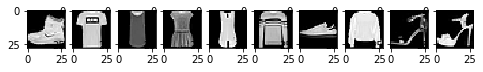

'label of Image = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]\n [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]\n [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]\n [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]\n [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]'

In [57]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 1
for i in range(1, columns*rows+1):
    
    img = trainX[i-1]
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(img,cmap='gray')
plt.show()

'label of Image = {}'.format(trainY[0:10]) ## np.argmax(trainY1[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
testY = testY.astype('float32')
trainY = trainY.astype('float32')

In [0]:
from sklearn.preprocessing import StandardScaler

In [60]:
trainX.shape

(60000, 28, 28)

In [0]:
transformer = StandardScaler()
testX_z = transformer.fit_transform(testX.reshape(784,10000))
trainX_z = transformer.fit_transform(trainX.reshape(784,60000))

In [0]:
trainX_z = trainX_z.reshape(60000, 28, 28)
testX_z = testX_z.reshape(10000, 28, 28)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
             metrics=['accuracy'])


In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
________________________________________________

### Execute the model using model.fit()

In [81]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.7673 - acc: 0.7239 - val_loss: 0.8103 - val_acc: 0.7058
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.7691 - acc: 0.7179 - val_loss: 0.7876 - val_acc: 0.7096
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7572 - acc: 0.7210 - val_loss: 0.7700 - val_acc: 0.7146
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7821 - acc: 0.7046 - val_loss: 0.8042 - val_acc: 0.7001
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.7926 - acc: 0.7013 - val_loss: 0.7746 - val_acc: 0.7049
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7897 - acc: 0.7013 - val_loss: 0.8190 - val_acc: 0.6874
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7752 - acc: 0.7046 - val_loss: 0.

In [82]:
input_data = np.expand_dims(testX_z[0], axis=0)
input_data.shape

(1, 28, 28)

In [0]:
pred = model.predict(input_data)

In [84]:
#Model prediction
prediction = model.predict(testX[0:1])

#Print prediction
print(prediction)

[[1.2495507e-03 6.4747063e-03 1.8795274e-06 4.3607924e-05 2.4537610e-06
  9.9466518e-02 6.2665051e-05 3.8736957e-01 9.0377795e-04 5.0442523e-01]]


In [85]:
#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

9


In [86]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

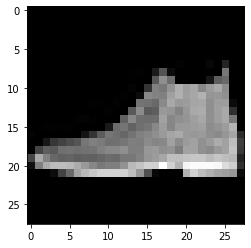

In [87]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_17 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

### Execute the model

In [96]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.3697 - acc: 0.1000 - val_loss: 2.3683 - val_acc: 0.1000
Epoch 2/100
60000/60000 [==============================] - 0s 1us/sample - loss: 2.3683 - acc: 0.1000 - val_loss: 2.3669 - val_acc: 0.1000
Epoch 3/100
60000/60000 [==============================] - 0s 1us/sample - loss: 2.3669 - acc: 0.1000 - val_loss: 2.3656 - val_acc: 0.1000
Epoch 4/100
60000/60000 [==============================] - 0s 1us/sample - loss: 2.3655 - acc: 0.1000 - val_loss: 2.3642 - val_acc: 0.1000
Epoch 5/100
60000/60000 [==============================] - 0s 1us/sample - loss: 2.3642 - acc: 0.1000 - val_loss: 2.3629 - val_acc: 0.1000
Epoch 6/100
60000/60000 [==============================] - 0s 1us/sample - loss: 2.3629 - acc: 0.1000 - val_loss: 2.3617 - val_acc: 0.1000
Epoch 7/100
60000/60000 [==============================] - 0s 1us/sample - loss: 2.3617 - acc: 0.1000 - val_loss: 2.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='mse')

In [0]:

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [105]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 2.3009 - acc: 0.1379 - val_loss: 2.2856 - val_acc: 0.2572
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 2.2656 - acc: 0.2477 - val_loss: 2.2290 - val_acc: 0.3250
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 2.1081 - acc: 0.3264 - val_loss: 1.9058 - val_acc: 0.3534
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.7063 - acc: 0.4127 - val_loss: 1.5155 - val_acc: 0.4738
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.3963 - acc: 0.5221 - val_loss: 1.2710 - val_acc: 0.5629
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 1.2143 - acc: 0.5691 - val_loss: 1.1277 - val_acc: 0.5948
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.0934 - acc: 0.6006 - val_loss: 1.

In [106]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_20 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_23 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='mse')

In [0]:

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [115]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4386 - acc: 0.8433 - val_loss: 0.4392 - val_acc: 0.8374
Epoch 2/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4297 - acc: 0.8467 - val_loss: 0.4349 - val_acc: 0.8403
Epoch 3/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4256 - acc: 0.8475 - val_loss: 0.4286 - val_acc: 0.8430
Epoch 4/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4176 - acc: 0.8507 - val_loss: 0.4228 - val_acc: 0.8443
Epoch 5/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4130 - acc: 0.8536 - val_loss: 0.4183 - val_acc: 0.8456
Epoch 6/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4085 - acc: 0.8544 - val_loss: 0.4139 - val_acc: 0.8478
Epoch 7/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4025 - acc: 0.8563 - val_loss: 0.